In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('housing.csv')

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,


### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [138]:
# Select only the features from above and fill in the missing values with 0
used_columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
df.columns = used_columns
df.fillna(0, inplace=True)
df.isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [139]:
# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df['total_rooms']/df['households']
df.head(n=2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137


In [140]:
#Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df.head(n=2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797


In [141]:
#Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population']/df['households']
df.head(n=2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [142]:
df['ocean_proximity'].value_counts()
#<1H OCEAN

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [145]:
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

In [146]:
len(df) == len(df_train) + len(df_test) + len(df_val)

True

In [147]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [148]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [149]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [150]:
df.head(n=2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842


### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [151]:
df_train.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [152]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [153]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']
categorical = ['ocean_proximity']

In [154]:
df_train_numerical = df_train.copy().loc[:,numerical]
df_train_numerical.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924648,-0.099794,0.039035,0.064607,0.093700,0.050609,-0.013163,-0.035467,0.099603,0.012300
longitude,-0.924648,1.000000,0.003247,-0.028851,-0.060535,-0.102423,-0.064677,-0.080827,0.120881,-0.121119,-0.003891
housing_median_age,-0.099794,0.003247,1.000000,-0.362182,-0.322832,-0.290909,-0.304716,-0.125801,-0.180858,0.133877,0.012429
total_rooms,0.039035,-0.028851,-0.362182,1.000000,0.931785,0.853763,0.920937,0.201013,0.161927,-0.194255,-0.029712
total_bedrooms,0.064607,-0.060535,-0.322832,0.931785,1.000000,0.877810,0.979132,-0.007004,0.007617,0.077486,-0.034761
population,0.093700,-0.102423,-0.290909,0.853763,0.877810,1.000000,0.907327,0.002083,-0.077202,0.030611,0.064448
households,0.050609,-0.064677,-0.304716,0.920937,0.979132,0.907327,1.000000,0.014912,-0.086746,0.057382,-0.032996
median_income,-0.013163,-0.080827,-0.125801,0.201013,-0.007004,0.002083,0.014912,1.000000,0.382606,-0.616635,-0.000848
rooms_per_household,-0.035467,0.120881,-0.180858,0.161927,0.007617,-0.077202,-0.086746,0.382606,1.000000,-0.488754,0.001870
bedrooms_per_room,0.099603,-0.121119,0.133877,-0.194255,0.077486,0.030611,0.057382,-0.616635,-0.488754,1.000000,-0.002556


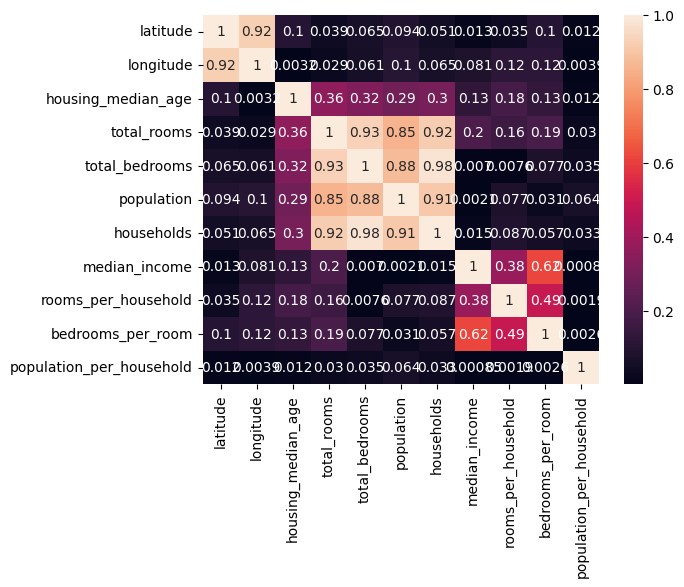

In [155]:
dataplot = sns.heatmap(df_train_numerical.corr().abs(), annot=True)

In [156]:
results = df_train_numerical.corr().abs().unstack().sort_values(ascending= False)
results

latitude                  latitude                    1.000000
longitude                 longitude                   1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
                                                        ...   
                          population                  0.002083
population_per_household  rooms_per_household         0.001870
rooms_per_household       population_per_household    0.001870
median_income             population_per_household    0.000848
population_per_household  median_income               0.000848
Length: 121, dtype: float64

**Ans**: according to the correlation matrix, total_bedrooms and households have the highest correlation value of 0.98

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [157]:
average = y_train.mean()
y_above_average_train = (y_train > average).astype(int)
y_above_average_val = (y_val > average).astype(int)
y_above_average_test = (y_test > average).astype(int)

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16

In [85]:
from sklearn.metrics import mutual_info_score

In [86]:
def mi_score(series):
    return mutual_info_score(series, above_average)

df_mi = df_train[categorical].apply(mi_score)
df_mi = df_mi.sort_values(ascending=False)

In [87]:
df_mi

ocean_proximity    0.102948
dtype: float64

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [121]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [118]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [122]:
model.fit(X_train, y_above_average_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [123]:
y_pred = model.predict(X_val)
accuracy = (y_pred == y_above_average_val).mean()
round(accuracy, 2)

0.83

In [ ]:
del df_train['ocean_proximity']
del df_val['ocean_proximity']
del df_test['ocean_proximity']


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [127]:
accuracy_differences = []
all_features = categorical + numerical

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

for f in all_features:
    features = all_features.copy()
    features.remove(f)

    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model.fit(X_train, y_above_average_train)

    y_pred = model.predict(X_val)
    accuracy_differences.append(abs(accuracy - (y_pred == y_above_average_val).mean()))

print(sorted(list(zip(all_features, accuracy_differences)), key=lambda k: k[1]))

[('total_bedrooms', 0.0), ('population_per_household', 0.0), ('rooms_per_household', 0.0003027550711474092), ('total_rooms', 0.0006055101422948184), ('bedrooms_per_room', 0.0009082652134423386), ('longitude', 0.003027550711474425), ('latitude', 0.0039358159249167635), ('households', 0.005449591280654031), ('housing_median_age', 0.006963366636391188), ('population', 0.009688162276718204), ('ocean_proximity', 0.015137753557372124), ('median_income', 0.04813805631244328)]


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [158]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [159]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [163]:
y_train = np.log1p(y_above_average_train)
y_val = np.log1p(y_above_average_val)
y_test = np.log1p(y_above_average_test)

In [167]:
alpha = [0, 0.01, 0.1, 1, 10]
scores = []
for a in alpha_ls:
    model = Ridge(alpha=a, solver="sag", random_state=42).fit(df_train, y_train)
    score = rmse(y_val, model.predict(df_val))
    scores.append(round(score, 3))
alpha[scores.index(min(scores))]

0